# $$\text{Variational Monte Carlo Simulation}$$
## $\text{Harmonic Oscillator}$
- $\text{Name: Utkarsh Maurya}$
- $\text{Roll No.: PH21B012}$

In [1]:
import numba
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Libraries needed: numpy, matplotlib, numba, tqdm   
If the code shows module not found, install the required libraries using example:   
`!pip install numba`

In [2]:
# Numba is a library which supports parallelization, which makes Monte Carlo Simulations Faster

# Defining the trial wavefunction for Harmonic Oscillator
@numba.njit
def psi(x, a):
    return np.sqrt(a)/np.pi**(1/4) * np.exp(-a**2 * x**2/2)

# Defining the local energy
@numba.njit
def EL(x, a):
    return a**2 + x**2 * (1 - a**4)

def exact_energy(a):
    return 1/2 * (a**2 + a**(-2))

# Metropolis algorithm
@numba.njit
def metropolis_sampling(mcs, a, step_size):
    samples = np.zeros(mcs)
    x = 0.0 
    for i in range(mcs):
        x_new = x + np.random.uniform(-step_size, step_size)
        
        prob_ratio = (psi(x_new, a)**2) / (psi(x, a)**2)
        
        if np.random.uniform(0, 1) < prob_ratio:
            x = x_new
        
        samples[i] = x
    return samples

# Variational Monte Carlo
@numba.njit
def VMC(mcs, a, step_size=1.0):
    samples = metropolis_sampling(mcs, a, step_size)
    
    local_energies = EL(samples, a)
    
    E = np.mean(local_energies[mcs//2:])
    E_var = np.var(local_energies[mcs//2:])
    
    return E, E_var, samples

mcs = int(1e5)
alpha_list = np.linspace(0.2,1.6,15)
step_size = 2

E_list = []
E_var_list = []
for i in range(len(alpha_list)):
    a = float(alpha_list[i])
    E, E_var, samples = VMC(mcs, a, step_size)
    E_list.append(E)
    E_var_list.append(E_var)

#### $\text{Data}$

In [3]:
data = {
    'alpha': alpha_list,
    'H': E_list,
    'sigma2': E_var_list
}
df = pd.DataFrame(data)

print(df)

    alpha          H      sigma2
0     0.2  12.436377  306.137464
1     0.3   5.342061   54.334827
2     0.4   3.206314   18.445705
3     0.5   2.100337    6.808920
4     0.6   1.564464    2.903114
5     0.7   1.264398    1.151248
6     0.8   1.103775    0.435149
7     0.9   1.024481    0.094024
8     1.0   1.000000    0.000000
9     1.1   1.016129    0.071647
10    1.2   1.069259    0.262001
11    1.3   1.142225    0.597239
12    1.4   1.239071    1.067483
13    1.5   1.370739    1.518663
14    1.6   1.480021    2.333152


#### $\text{Plot}$

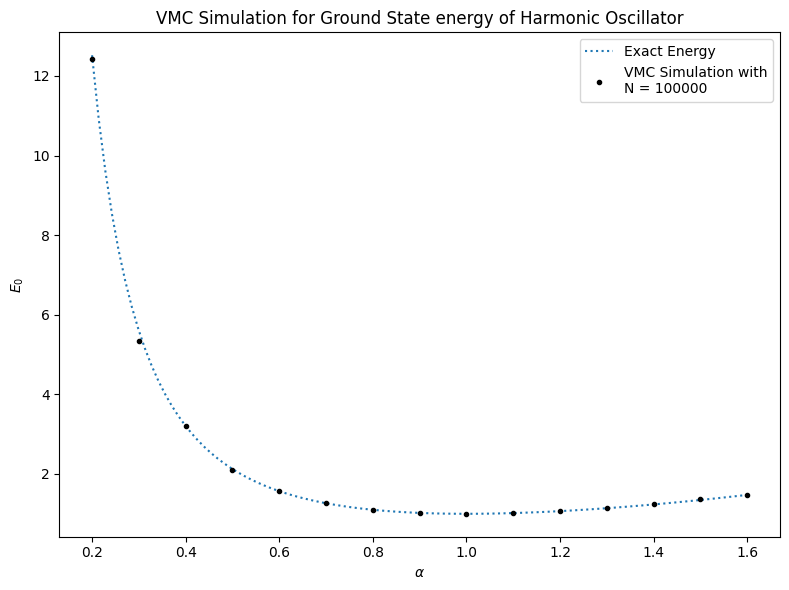

In [4]:
a1 = np.linspace(0.2,1.6,100)
plt.figure(figsize=(8,6))
plt.plot(a1, exact_energy(a1),':', label='Exact Energy')
plt.plot(alpha_list,E_list,'k.', label='VMC Simulation with\nN = 100000')
plt.title('VMC Simulation for Ground State energy of Harmonic Oscillator')
plt.xlabel('$\\alpha$')
plt.ylabel('$E_0$')
plt.legend()
plt.tight_layout()
plt.savefig('plot1.png',dpi=300)
plt.show()